This notebook explores the Richter's Predictor: Modeling Earthquake Damage hosted by Driven Data. The 2015 earthquake that hit Gorkha in Western Nepal was measured 7.8 on richter scale and caused considerable damage. The damage to the buildings were graded in a scale of 1 to 3, 1 being the least damage and 3 being complete destruction. The data was collected through surveys by central bureau of statistics of Nepal. It is information on geographic and physical conditions of buildings and socio-economic-demograhic characteristics. The primary objective here is to predict the damage grade of buildings based on the provided data.   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('train_values.csv',index_col='building_id')
train_label = pd.read_csv('train_labels.csv', index_col='building_id')

In [4]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_label.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [6]:
all_data = train_data.join(train_label)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

There are 39 columns, 31 are numeric and 8 are categorical. The data points are indetified with an unique 'building id' identifier. The first three columns have information geographic regions to which buildings belong. The columns 14 through 24 are one hot encoded for same charateristics of type of superstructure of building. Similarly, Columns 27 through 37 are one hot encoded for same charateristics of secondary use of the building. We will explore the columns individual and try to understand how they relate to the damage grade of building itself.

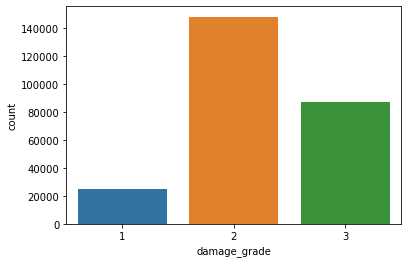

In [17]:
sns.countplot(data=all_data, x='damage_grade')
plt.show()

In [51]:
all_data['damage_grade'].value_counts(normalize=True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

The Damage grade 

Distribution of damage grade shows that most buildings suffered from eaither moderate damage(57%) or complete destruction (33%). This shows devastating nature of the earthquake. However, there is a possibility of selection bias in data collection itself. The data collectors may have gravitated towards surveying the buidlings which were obvously most damaged or appeared most damged. We dont have enough inofrmation to rule it out.

In [18]:
geo_id_df = all_data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']]
geo_id_df.nunique()

geo_level_1_id       31
geo_level_2_id     1414
geo_level_3_id    11595
dtype: int64

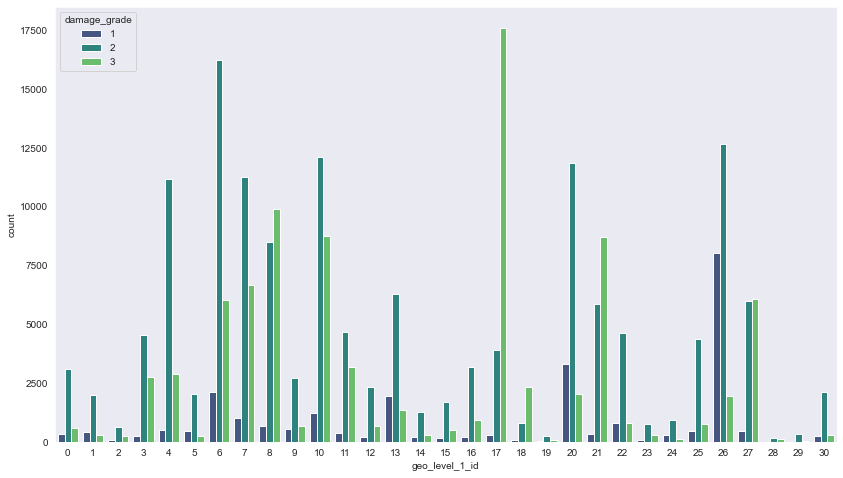

In [22]:
plt.figure(figsize=(14,8))
sns.set_style('dark')
g = sns.countplot(data=all_data, x='geo_level_1_id', hue='damage_grade', palette='viridis')
#g.set_yscale("log")
plt.show()

Geography
There are three columns with geographic region inofrmation. This information is a bit confusing. The 'geo_level_1_id' ranges  0-30. It is not clear what these numbers actually represent. The assumptions here is 'geo_level_2_id' and 'geo_level_3_id' are detailed representations of 'geo_level_1_id'. The geographic information is obviously important because the intensity and destructive power of an earthquake is closer to it's epicenter. The distribution of the buildings examined across 'geo_level_1_id' shows that most of the damaged buildings were located in geographic regions 4,6,7,8,10, 17,20, 21, 26 and 27. Among these regions, the regions 8,17,18 stand out where the proportion of damage grade 3 buildings is eponentialy higher than other damge grades.  

In [286]:
all_data['count_floors_pre_eq'].value_counts(normalize=True)

2    0.601007
3    0.213418
1    0.155184
4    0.020813
5    0.008619
6    0.000802
7    0.000150
9    0.000004
8    0.000004
Name: count_floors_pre_eq, dtype: float64

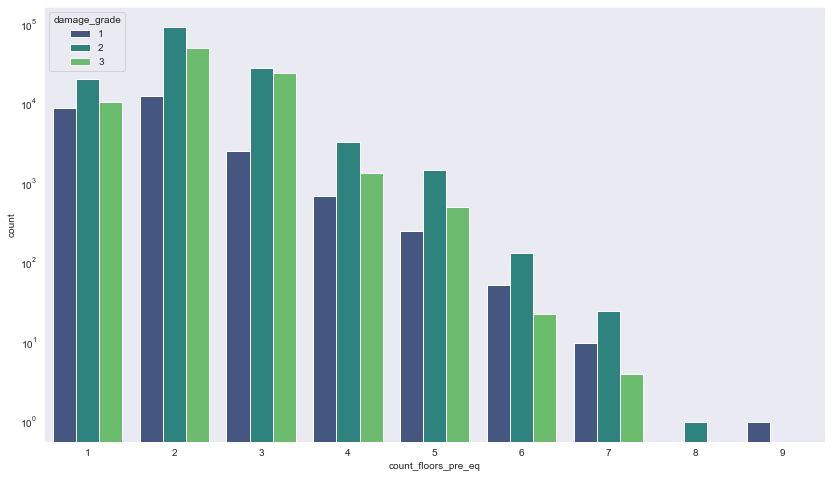

In [21]:
ax = plt.figure(figsize=(14,8))
sns.set_style('dark')
g = sns.countplot(data=all_data, x='count_floors_pre_eq', hue='damage_grade', palette='viridis')
g.set_yscale("log")
plt.show()

Floor Count

Number of floors of a building realtes to it's strucutral stability. 60% of the buidlings had 2 floors are 21% of the buidlings had 3 floors. The buidlings with 2-5 floors suffered more destruction as these buidlings had higher proprtion of damage grade 2 and 3. 

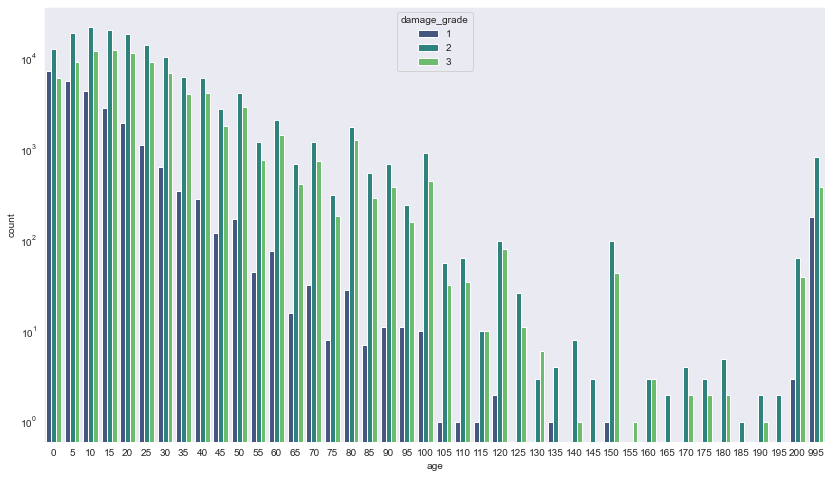

In [20]:
ax = plt.figure(figsize=(14,8))
sns.set_style('dark')
g = sns.countplot(data=all_data, x='age',hue='damage_grade',palette='viridis')
g.set_yscale("log")
plt.show()

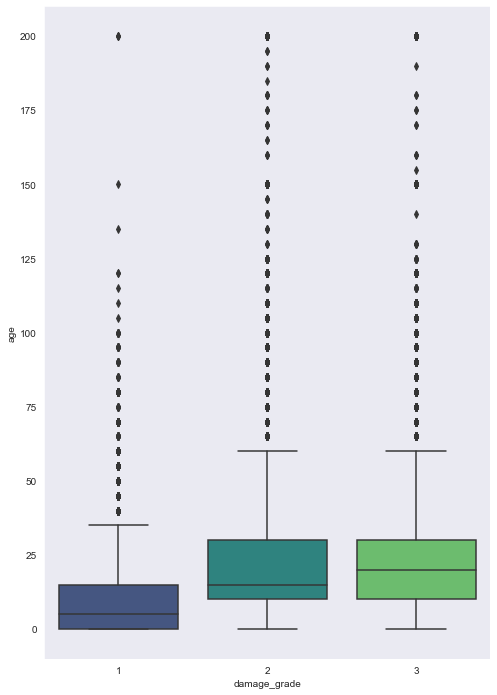

In [23]:
plt.figure(figsize=(8,12))
sns.set_style('dark')
g = sns.boxplot(data=all_data[all_data['age']<=200], x='damage_grade',y='age',palette='viridis')
#g.set_yscale("log")
plt.show()

The age of the buildings is expected to influence the structural soundness of the building. The age of buidling ranges between 0-200 years and there is a cluster of buildings plder than 200 years. Their age is listed as 995 years. This is either 'na' value or very old buildings whoose age could not be ascertained. In general, severity of damage to buildings seems to be increasing with it's age. 

In [140]:
all_data['area_percentage'].describe()

count    260601.000000
mean          8.018051
std           4.392231
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

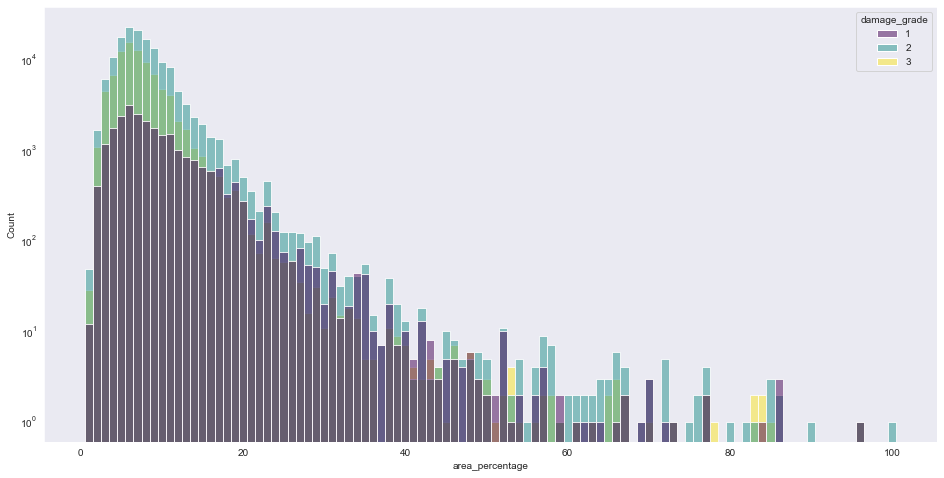

In [19]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
g = sns.histplot(data=all_data, x='area_percentage',hue='damage_grade',discrete=True,palette='viridis')
g.set_yscale("log")
plt.show()

The area_percentage is described as the normalized area of the building footprint.So, higher the area_percentage, bigger the house. This distribution skewed to left. The damge severity is higher with smaller size(area_percentage<15) 

In [28]:
data_obj = all_data.select_dtypes('object')
data_obj.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

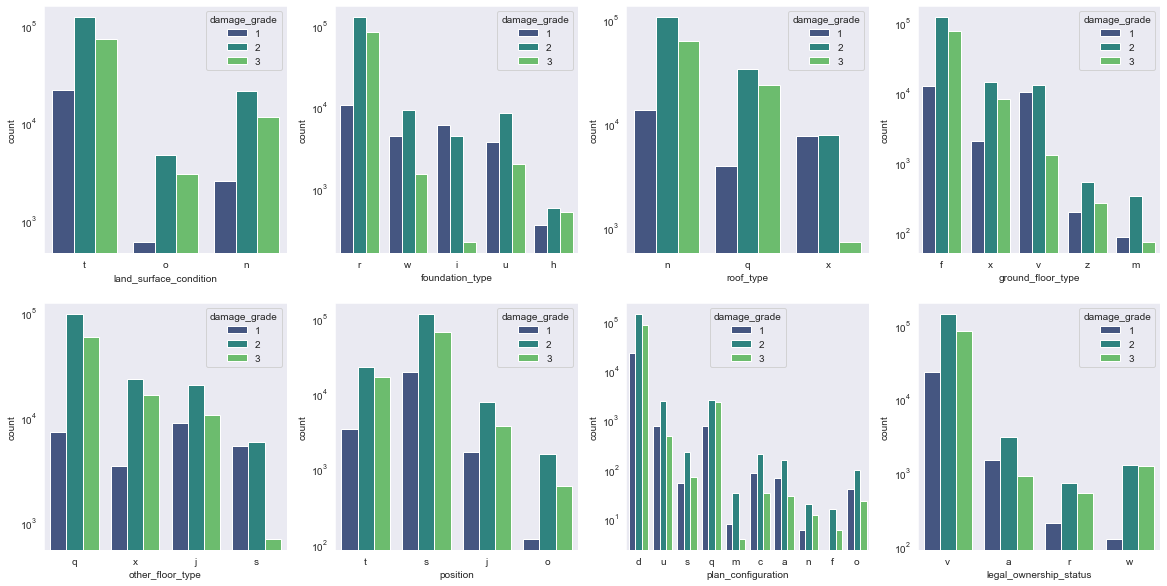

In [29]:
fig, ax = plt.subplots(2, 4, figsize= (20,10))
ax = ax.flatten()

for i, col in list(zip(ax, data_obj.columns.to_list())):
    sns.countplot(data=all_data, x=col, ax=i, hue='damage_grade',palette='viridis')
    i.set_yscale("log")

In [221]:
all_data['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

In [259]:
import re
a_list = []
for i in all_data.columns.to_list():
    if re.search(r"\Ahas_superstructure_.", i): a_list.append(i)


In [265]:
re.split(r"\Ahas_superstructure_",a_list[0])

['', 'adobe_mud']

In [269]:
all_data[a_list]

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
building_id,,,,,,,,,,,
802906,1,1,0,0,0,0,0,0,0,0,0
28830,0,1,0,0,0,0,0,0,0,0,0
94947,0,1,0,0,0,0,0,0,0,0,0
590882,0,1,0,0,0,0,1,1,0,0,0
201944,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
688636,0,1,0,0,0,0,0,0,0,0,0
669485,0,1,0,0,0,0,0,0,0,0,0
602512,0,1,0,0,0,0,0,0,0,0,0


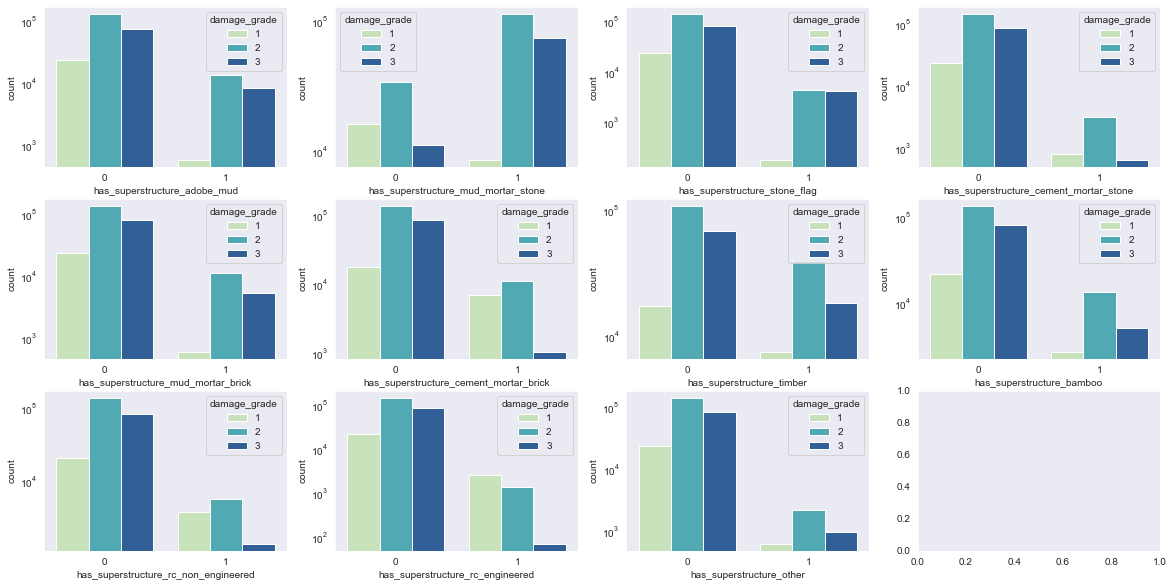

In [270]:
fig, ax = plt.subplots(3, 4, figsize= (20,10))
ax = ax.flatten()

for i, col in list(zip(ax, a_list)):
    sns.countplot(data=all_data, x=col, ax=i, hue='damage_grade',palette='YlGnBu')
    i.set_yscale("log")

In [272]:
b_list = []
for i in all_data.columns.to_list():
    if re.search(r"\Ahas_secondary_.", i): b_list.append(i)
all_data[b_list]

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,
802906,0,0,0,0,0,0,0,0,0,0,0
28830,0,0,0,0,0,0,0,0,0,0,0
94947,0,0,0,0,0,0,0,0,0,0,0
590882,0,0,0,0,0,0,0,0,0,0,0
201944,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
688636,0,0,0,0,0,0,0,0,0,0,0
669485,0,0,0,0,0,0,0,0,0,0,0
602512,0,0,0,0,0,0,0,0,0,0,0


In [276]:
idx = all_data[all_data['has_secondary_use']== 1].index
all_data[b_list].loc[idx]

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,
333020,1,1,0,0,0,0,0,0,0,0,0
793397,1,1,0,0,0,0,0,0,0,0,0
973909,1,1,0,0,0,0,0,0,0,0,0
440102,1,0,0,1,0,0,0,0,0,0,0
552720,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
977263,1,1,0,0,0,0,0,0,0,0,0
317439,1,1,0,0,0,0,0,0,0,0,0
603159,1,1,0,0,0,0,0,0,0,0,0


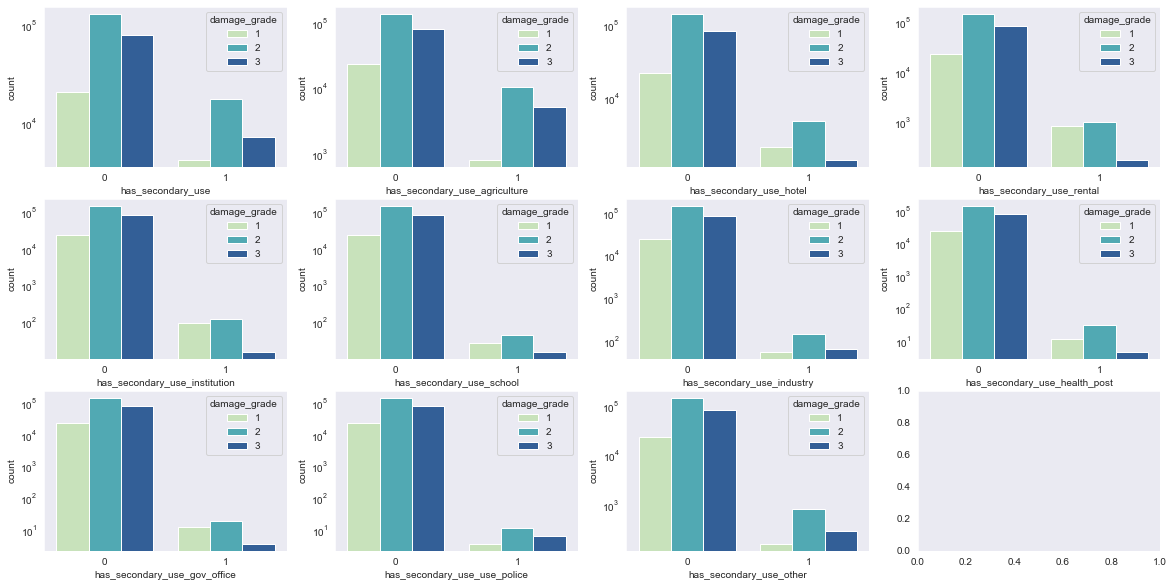

In [277]:
fig, ax = plt.subplots(3, 4, figsize= (20,10))
ax = ax.flatten()

for i, col in list(zip(ax, b_list)):
    sns.countplot(data=all_data, x=col, ax=i, hue='damage_grade',palette='YlGnBu')
    i.set_yscale("log")

In [279]:
all_data['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

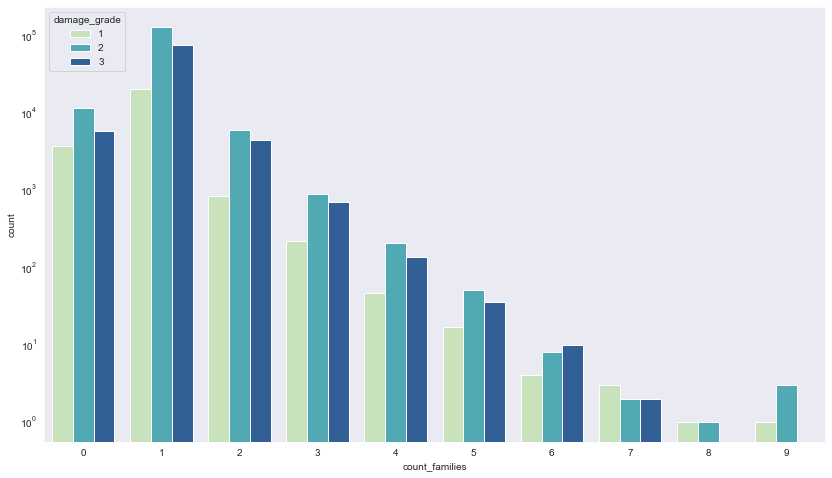

In [281]:
ax = plt.figure(figsize=(14,8))
sns.set_style('dark')
g = sns.countplot(data=all_data, x='count_families', hue='damage_grade', palette='YlGnBu')
g.set_yscale("log")
plt.show()